In [1]:
# conda: rioxarray_gridtools

In [2]:
# In this example, we recreate the NEP7 grid
# Part A: outside the gridtools library
# Part B: using the gridtools library
#
# NEP7 grid details
# Cartesian grid
#   dx: 5000 meters
#   dy: 5000 meters
# Grid extent:
#   X: -2902500 to 2902500
#   Y: -2902500 to 2902500
# +proj=lcc +lon_0=-90 +lat_1=40 +lat_2=60
# Projection
#   Lambert Conformal Conic
#   lat_0=0.0 (latitude of projection center)
#   lon_0=-90.0 (longitude where scale is not distorted)
#   lat_1=40
#   lat_2=60
#


In [3]:
import os, sys
sys.path.append('/Users/james/Documents/Github/gridtools/gridTools/lib/')
from gridutils import GridUtils

In [69]:
import xarray as xr
import numpy as np

# load nep7
nep7 = xr.open_dataset("/Users/james/Documents/Github/gridtools/gridTools/nep7_grid/ocean_hgrid.nc")
# get x bounds in meters
xextm = np.sum(nep7.dx.values[-1,:])/2
yextm = np.sum(nep7.dy.values[:,-1])/2


In [71]:
# NEP7
# Working in cartesian coordinates, all values are in meters
# NOTE: To create a true MOM6 supergrid, the cell spacing
# is half the length of a full grid cell.
dx = 5000.
dy = 5000.
x = np.arange(-1. * xextm, 1. * xextm + dx, dx, dtype=np.float32)
y = np.arange(-1. * yextm, 1. * yextm + dy, dy, dtype=np.float32)

In [72]:
# This is the grid size
y.shape, x.shape

((1554,), (650,))

In [73]:
yy, xx = np.meshgrid(y, x)

In [74]:

# From the command line we can convert single points
# gdaltransform -s_srs "+proj=lcc +lon_0=-90 +lat_1=40 +lat_2=60" -t_srs EPSG:4326
# The pyproj library provides for 2D array transformation of coordinates.

from pyproj import CRS, Transformer

PROJSTRING = "+proj=lcc +lon_0=-90 +lat_1=40 +lat_2=60"

# create the coordinate reference system
crs = CRS.from_proj4(PROJSTRING)
# create the projection from lon/lat to x/y
proj = Transformer.from_crs(crs.geodetic_crs, crs)

# compute the lon/lat
lon, lat = proj.transform(yy, xx, direction='INVERSE')

In [75]:
# Confirm we have the correct grid points and lat lon values
print(yy[0,0], xx[0,0], lat[0,0], lon[0,0])
print(yy[x.shape[0]-1, y.shape[0]-1], xx[x.shape[0]-1, y.shape[0]-1], lat[x.shape[0]-1, y.shape[0]-1], lon[x.shape[0]-1, y.shape[0]-1])

-3882034.0 -1620734.2 -13.037064471490257 -111.56594362140245
3882966.0 1624265.8 6.015959416402807 -61.85611413087621


In [76]:
grd = GridUtils()

In [77]:
grd.clearGrid()

In [78]:
# Define NEP7 grid for gridtools library
grd.setGridParameters({
    'projection': {
        'name': "LambertConformalConic",
        'ellps': 'WGS84',
        'lat_0': 0,
        'lon_0': -90,
        'lat_1': 40,
        'lat_2': 60,
        'dx': 5000.0,
        'dy': 5000.0,
        'dxUnits': 'meters',
        'dxUnits': 'meters'
    }
})
grd.grid['x'] = (('nyp','nxp'), lon)
grd.grid['y'] = (('nyp','nxp'), lat)

In [79]:
grd.grid

<xarray.Dataset>
Dimensions:  (nxp: 1554, nyp: 650)
Dimensions without coordinates: nxp, nyp
Data variables:
    x        (nyp, nxp) float64 -111.6 -111.5 -111.5 ... -61.92 -61.89 -61.86
    y        (nyp, nxp) float64 -13.04 -13.03 -13.02 ... 6.042 6.029 6.016

In [87]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'LambertConformalConic',
            'ellps': 'WGS84',
            'lat_0': 0,
            'lon_0': -90,
            'lat_1': 40,
            'lat_2': 60,
        },
        'extent': [],
        'iLinewidth': 0.1,
        'jLinewidth': 0.1,
        'showGrid': True,
        'title': 'LCC : NEP7',
        'iColor': 'r',
        'jColor': 'b'
    }
)

In [88]:
(figure, axes) = grd.plotGrid()

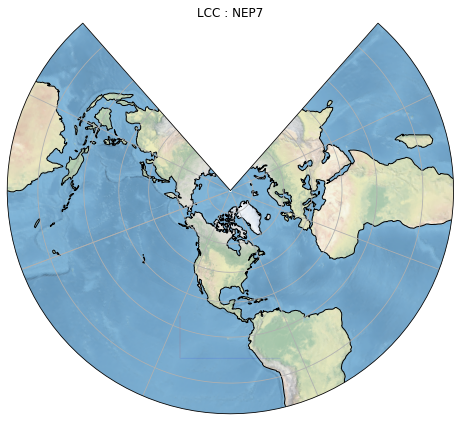

In [89]:
figure

In [90]:
# Compute grid metrics
grd.computeGridMetrics()

In [91]:
grd.grid

<xarray.Dataset>
Dimensions:   (nx: 1553, nxp: 1554, ny: 649, nyp: 650)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -111.6 -111.5 -111.5 ... -61.92 -61.89 -61.86
    y         (nyp, nxp) float64 -13.04 -13.03 -13.02 ... 6.042 6.029 6.016
    dx        (nyp, nx) float64 2.972e+03 2.973e+03 ... 3.921e+03 3.921e+03
    dy        (ny, nxp) float64 2.989e+03 2.989e+03 ... 3.939e+03 3.939e+03
    angle_dx  (nyp, nxp) float64 0.2914 0.2912 0.2909 ... -0.3801 -0.3803
    area      (ny, nx) float64 8.885e+06 8.887e+06 ... 1.545e+07 1.544e+07
Attributes:
    grid_version:  0.2
    code_version:  GridTools: 0.1
    history:       2021-04-29 15:13:06: create grid with python GridTools
    projection:    LambertConformalConic
    proj:          +ellps=WGS84 +proj=lcc +lon_0=0 +lat_0=-90 +x_0=0.0 +y_0=0...

In [92]:
grd.grid.area

<xarray.DataArray 'area' (ny: 649, nx: 1553)>
array([[ 8884830.89925867,  8887252.87663003,  8889672.57770687, ...,
         8889221.76299655,  8886801.59220814,  8884379.21738852],
       [ 8892962.18460769,  8895387.01638012,  8897809.60798969, ...,
         8897358.17904116,  8894935.226115  ,  8892509.96076266],
       [ 8901099.90139203,  8903527.58756553,  8905953.03357616, ...,
         8905501.0987844 ,  8903075.29145718,  8900647.17170377],
       ...,
       [15419183.84977558, 15423846.27906309, 15428504.08349825, ...,
        15427636.20104718, 15422977.56558386, 15418314.30526819],
       [15430948.93220981, 15435614.93853157, 15440276.35613263, ...,
        15439407.8233117 , 15434745.53855082, 15430078.66506924],
       [15442717.08583505, 15447386.70532273, 15452051.77222135, ...,
        15451182.5528989 , 15446516.65497211, 15441846.16832462]])
Dimensions without coordinates: ny, nx
Attributes:
    units:    meters^2

In [93]:
nep7.area.values

array([[16991296., 16997952., 17004604., ..., 20201348., 20203766.,
        20206176.],
       [17002518., 17009178., 17015834., ..., 20213982., 20216400.,
        20218810.],
       [17013740., 17020404., 17027064., ..., 20226610., 20229028.,
        20231440.],
       ...,
       [25758958., 25757898., 25756804., ..., 16411003., 16383695.,
        16356341.],
       [25758890., 25757826., 25756730., ..., 16405458., 16378123.,
        16350743.],
       [25758822., 25757756., 25756658., ..., 16399991., 16372631.,
        16345226.]], dtype=float32)